In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def kalman(x, z, n_iter):
    Q = 1e-5
    R = 0.1**2
    
    sz = (n_iter,)
    x̂ = np.zeros(sz)
    P = np.zeros(sz)
    x̂minus = np.zeros(sz)
    Pminus = np.zeros(sz)
    Kp = np.zeros(sz)
    ave = np.zeros(sz)
    
    x̂[0] = 0.0
    P[0] = 1.0
    
    for k in range(1, n_iter):
        x̂minus[k] = x̂[k-1]
        Pminus[k] = P[k-1] + Q
        
        Kp[k] = Pminus[k]/(Pminus[k] + R)
        x̂[k] = x̂minus[k] + Kp[k] * (z[k] - x̂minus[k])
        P[k] = (1 - Kp[k]) * Pminus[k]
        
        ave[k] = np.average(z[:k])
        
        
    plt.figure()
    plt.plot(z, 'k+', label='noisy measurements', alpha=0.2)
    plt.plot(x̂, 'b--', label='Kalman Filter')
    plt.plot(ave, 'r:', label='Taking the average')
    plt.plot(x, color='g', label='truth value')
    plt.legend()
    plt.xlabel('iteration')
    plt.ylabel('voltage')
    plt.show()

## Case: Constant Truth Value

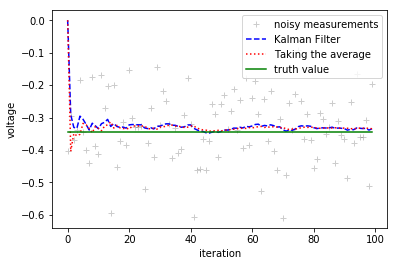

In [3]:
# inital parameters
n_iter = 100

x = -0.345 * np.ones(n_iter)
z = np.random.normal(x, 0.1, size=n_iter)

kalman(x,z,n_iter)


The average of the data does just as well as the Kalman filter.

## Case: Change in Truth Value

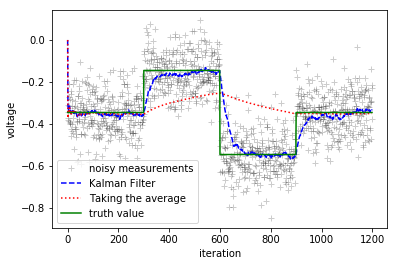

In [4]:
n_iter2 = 1200

x2 = -0.345 * np.ones(n_iter2)
z2 = np.random.normal(x2, 0.1, size=n_iter2)


z2[300:600] += 0.2
x2[300:600] += 0.2

z2[600:900] -= 0.2
x2[600:900] -= 0.2

kalman(x2,z2,n_iter2)


The Kalman filter performs much better

## Case: Change that lasts a very long time

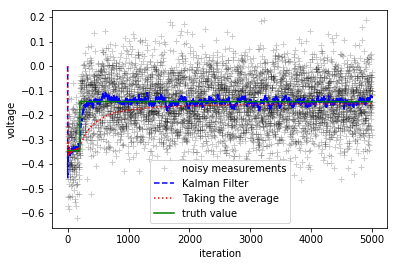

In [5]:
n_iter3 = 5000

x3 = -0.345 * np.ones(n_iter3)
z3 = np.random.normal(x3, 0.1, size=n_iter3)


z3[200:] += 0.2
x3[200:] += 0.2

kalman(x3,z3,n_iter3)

The Kalman filter has a much faster rise time. The Average evenutally reaches the Truth value.